In [20]:
import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd
import scvi

AttributeError: module 'torch.optim.lr_scheduler' has no attribute 'LRScheduler'

In [4]:
normalCells = sc.read_h5ad('hlca/normalCells.h5ad')

In [1]:
adata

NameError: name 'adata' is not defined

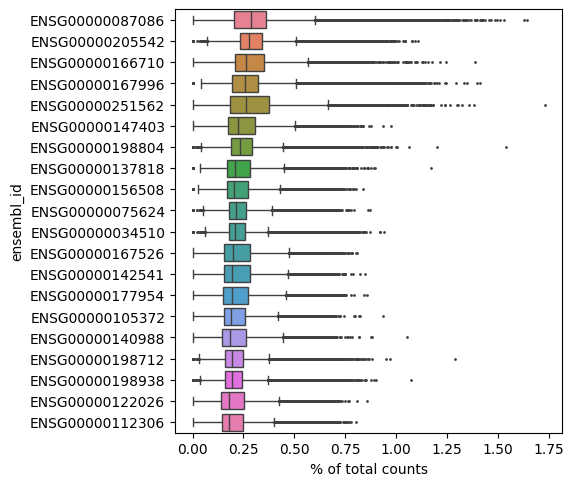

In [10]:
sc.pl.highest_expr_genes(sclcCells, n_top=20, )

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=10)

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

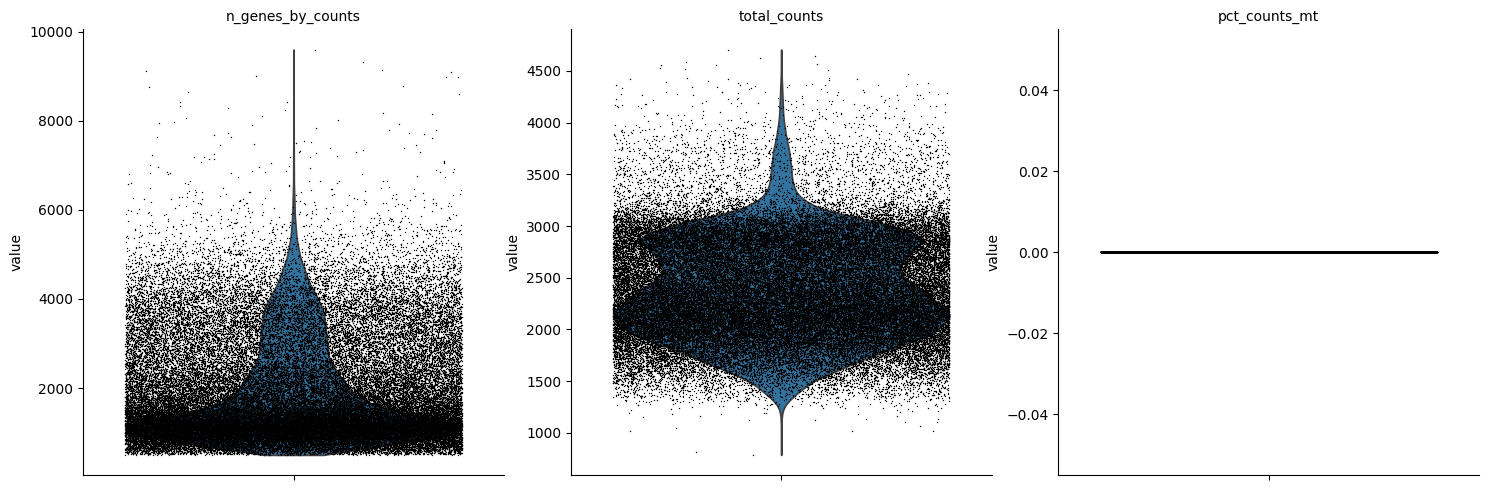

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

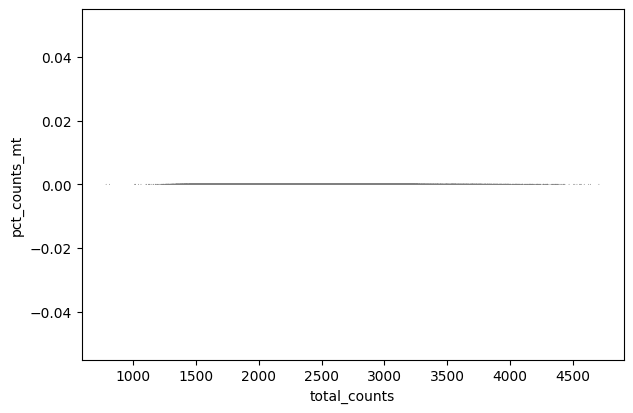

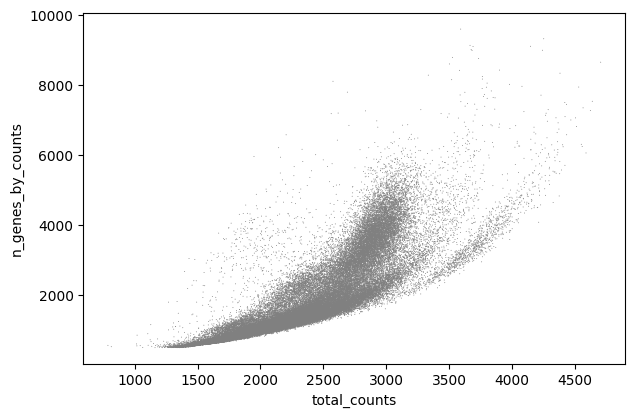

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [10]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
sc.pp.log1p(adata)

In [14]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

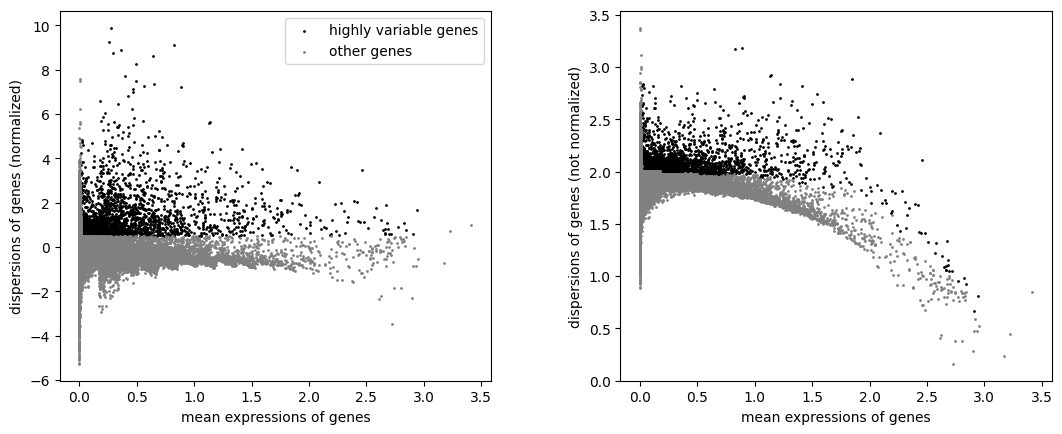

In [15]:
sc.pl.highly_variable_genes(adata)

In [16]:
adata.raw = adata

In [17]:
adata = adata[:, adata.var.highly_variable]

In [22]:
sc.pp.regress_out(adata, ['total_counts', 'n_genes_by_counts'])


In [23]:
sc.pp.scale(adata, max_value=10)

In [24]:
sc.tl.pca(adata, svd_solver='arpack')


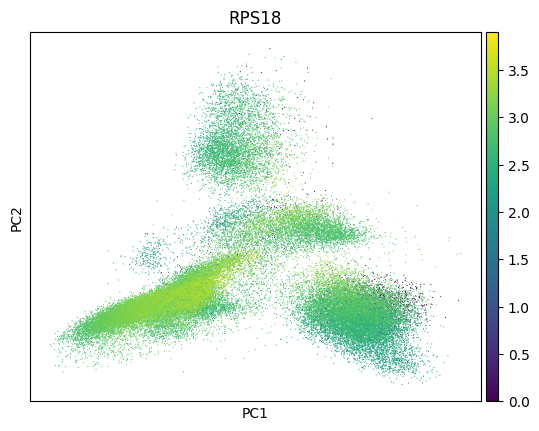

In [80]:
sc.pl.pca(adata, color="RPS18")

In [82]:
!pip install 'squidpy[interactive]'

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.0 MB/s eta 0:00:00a

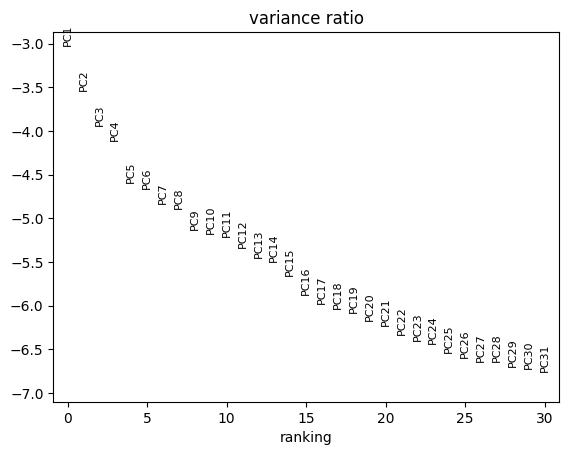

In [26]:
sc.pl.pca_variance_ratio(adata, log=True)

In [28]:
adata

AnnData object with n_obs × n_vars = 48368 × 2912
    obs: 'nGene', 'nUMI', 'orig.ident', 'channel', 'tissue', 'region', 'percent.ribo', 'free_annotation', 'patient', 'sample', 'location', 'magnetic.selection', 'preparation.site', 'compartment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_Compartment_tSNE', 'X_tSNE', 'X_pca'
    varm: 'PCs'

In [29]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [34]:
# sc.tl.paga(adata)
# sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata, init_pos='paga')

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


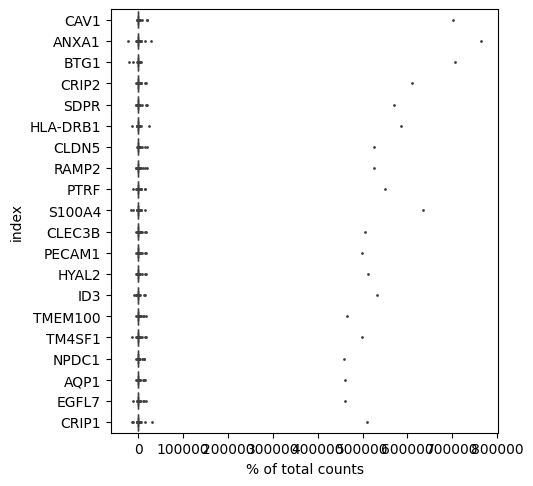

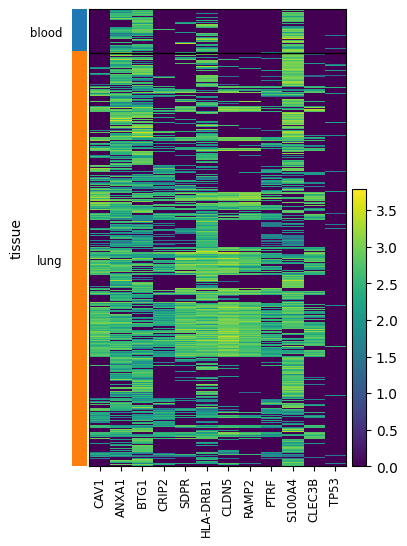

In [72]:
top20 = sc.pl.highest_expr_genes(adata, n_top=20, )
sc.pl.heatmap(adata, var_names=['CAV1','ANXA1','BTG1','CRIP2','SDPR','HLA-DRB1','CLDN5','RAMP2','PTRF','S100A4','CLEC3B','TP53'], groupby='tissue')

In [65]:
sc.tl.leiden(adata)


In [66]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

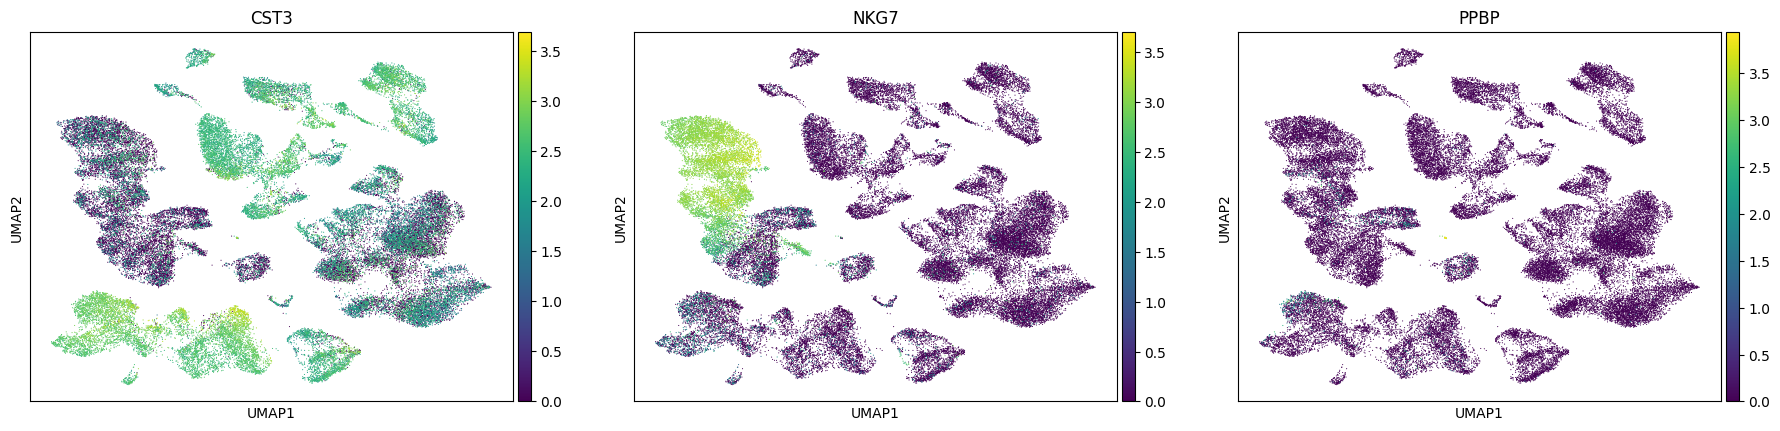

In [73]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

In [87]:
import squidpy as sq

sq.datasets.visium('Visium_FFPE_Human_Lung_Cancer', include_hires_tiff=False, base_dir=None)

HTTPError: HTTP Error 403: Forbidden